In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_hmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (10.,8.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_cmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (12.,12.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import matplotlib        as mt
import os
from matplotlib.gridspec import GridSpec

In [3]:
my_data = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')
rsgs = my_data[my_data['UV_CLASS_YI2011']!='RSF']
uvup = my_data[my_data['UV_CLASS_YI2011']=='UV_UPTURN']
uvwk = my_data[my_data['UV_CLASS_YI2011']=='UV_WEAK']

In [4]:
results_path = '../../LargeFilesResults/ThesisFigs/'

In [5]:
palette = ['#dfc27d', '#a6611a']

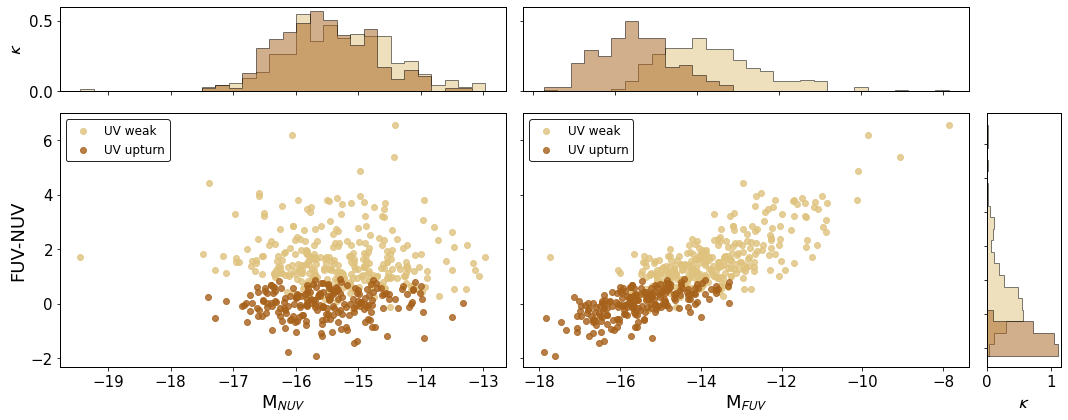

In [6]:
plt.rcParams.update(plotpars_2cols)

fig = plt.figure(figsize=(15, 6))
gs  = GridSpec(2, 3, height_ratios=[1., 3.], width_ratios=[3., 3., .5])

# PLOT 01 ========================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])
# ax1_margy = fig.add_subplot(gs[1,1])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l1 = ax1_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')


n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_NUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax1_margx.get_xticklabels(), visible=False)
ax1_margx.axes.set_ylim([0, 0.6])


ax1_joint.set_xlabel("M$_{NUV}$")
ax1_joint.set_ylabel("FUV-NUV")

ax1_margx.set_ylabel(r"$\kappa$")

# PLOT 02 ========================================================================================================
ax2_joint = fig.add_subplot(gs[1,1])
ax2_margx = fig.add_subplot(gs[0,1])
ax2_margy = fig.add_subplot(gs[1,2])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l2 = ax2_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l2.get_frame().set_edgecolor('black')
plt.setp(ax2_joint.get_yticklabels(), visible=False)


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_FUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_FUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax2_margx.get_xticklabels(), visible=False)
ax2_margx.axes.set_ylim([0, 0.6])
plt.setp(ax2_margx.get_yticklabels(), visible=False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], color=palette[0], alpha=0.5, bins=20, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
plt.setp(ax2_margy.get_yticklabels(), visible=False)

ax2_joint.set_xlabel("M$_{FUV}$")
ax2_margy.set_xlabel(r"$\kappa$")

plt.tight_layout()

plt.savefig(os.path.join(results_path, 'uv_color_mags.png'))
plt.savefig(os.path.join(results_path, 'uv_color_mags.pdf'))
plt.show()

In [7]:
plt.clf()

<Figure size 1080x360 with 0 Axes>

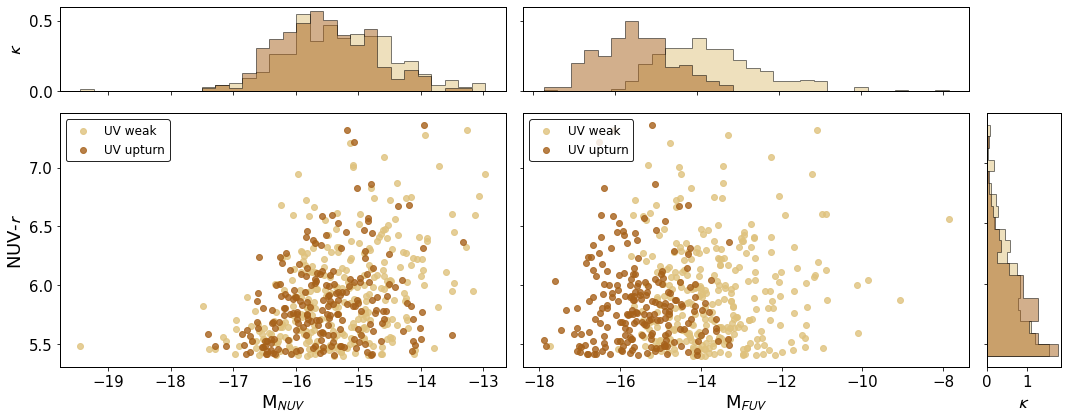

In [8]:
plt.rcParams.update(plotpars_2cols)

fig = plt.figure(figsize=(15, 6))
gs  = GridSpec(2, 3, height_ratios=[1., 3.], width_ratios=[3., 3., .5])

# PLOT 01 ========================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])
# ax1_margy = fig.add_subplot(gs[1,1])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l1 = ax1_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')


n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_NUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax1_margx.get_xticklabels(), visible=False)
ax1_margx.axes.set_ylim([0, 0.6])


ax1_joint.set_xlabel("M$_{NUV}$")
ax1_joint.set_ylabel(r"NUV-$r$")

ax1_margx.set_ylabel(r"$\kappa$")

# # PLOT 02 ========================================================================================================
ax2_joint = fig.add_subplot(gs[1,1])
ax2_margx = fig.add_subplot(gs[0,1])
ax2_margy = fig.add_subplot(gs[1,2])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l2 = ax2_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l2.get_frame().set_edgecolor('black')
plt.setp(ax2_joint.get_yticklabels(), visible=False)


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_FUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_FUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax2_margx.get_xticklabels(), visible=False)
ax2_margx.axes.set_ylim([0, 0.6])
plt.setp(ax2_margx.get_yticklabels(), visible=False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, bins=20, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
plt.setp(ax2_margy.get_yticklabels(), visible=False)

ax2_joint.set_xlabel("M$_{FUV}$")
ax2_margy.set_xlabel(r"$\kappa$")

plt.tight_layout()

plt.savefig(os.path.join(results_path, 'uvopt01_color_mags.png'))
plt.savefig(os.path.join(results_path, 'uvopt01_color_mags.pdf'))
plt.show()

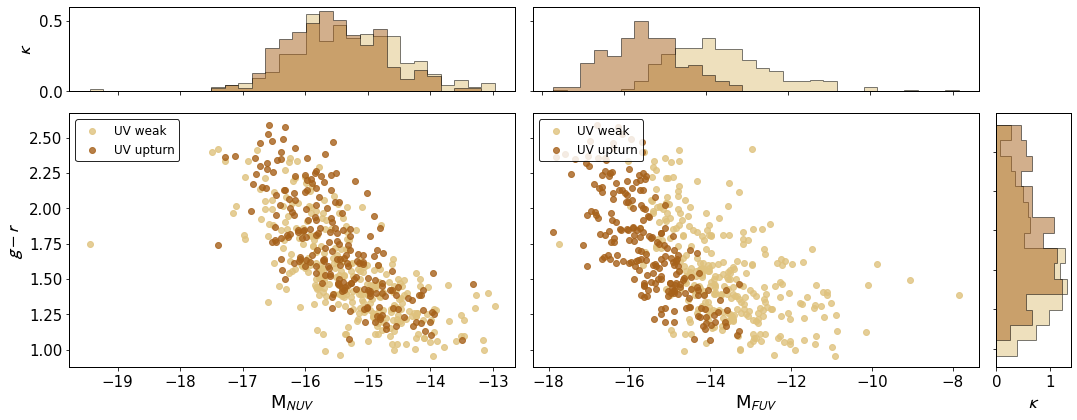

In [9]:
plt.rcParams.update(plotpars_2cols)

fig = plt.figure(figsize=(15, 6))
gs  = GridSpec(2, 3, height_ratios=[1., 3.], width_ratios=[3., 3., .5])

# PLOT 01 ========================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])
# ax1_margy = fig.add_subplot(gs[1,1])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l1 = ax1_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')


n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_NUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax1_margx.get_xticklabels(), visible=False)
ax1_margx.axes.set_ylim([0, 0.6])


ax1_joint.set_xlabel("M$_{NUV}$")
ax1_joint.set_ylabel(r"$g-r$")

ax1_margx.set_ylabel(r"$\kappa$")

# # PLOT 02 ========================================================================================================
ax2_joint = fig.add_subplot(gs[1,1])
ax2_margx = fig.add_subplot(gs[0,1])
ax2_margy = fig.add_subplot(gs[1,2])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l2 = ax2_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l2.get_frame().set_edgecolor('black')
plt.setp(ax2_joint.get_yticklabels(), visible=False)


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_FUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_FUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax2_margx.get_xticklabels(), visible=False)
ax2_margx.axes.set_ylim([0, 0.6])
plt.setp(ax2_margx.get_yticklabels(), visible=False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, bins=15, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_G']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
plt.setp(ax2_margy.get_yticklabels(), visible=False)

ax2_joint.set_xlabel("M$_{FUV}$")
ax2_margy.set_xlabel(r"$\kappa$")

plt.tight_layout()

plt.savefig(os.path.join(results_path, 'uvopt02_color_mags.png'))
plt.savefig(os.path.join(results_path, 'uvopt02_color_mags.pdf'))
plt.show()

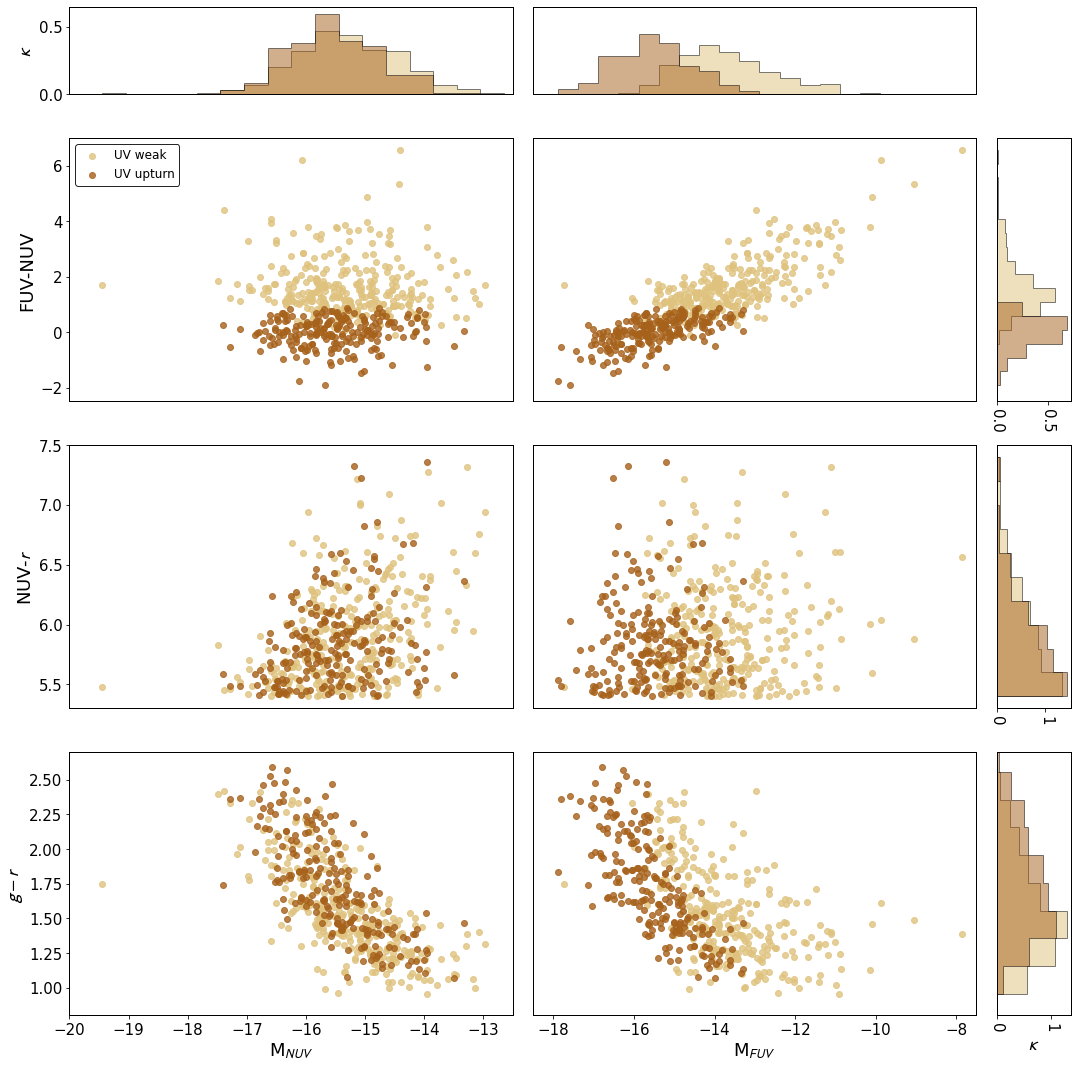

In [18]:
plt.rcParams.update(plotpars_2cols)

fig = plt.figure(figsize=(15, 15))
gs  = GridSpec(4, 3, height_ratios=[1., 3., 3., 3.], width_ratios=[3., 3., .5])

# PLOT 01 (left) =================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l1 = ax1_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')
ax1_joint.axes.set_xlim([-20, -12.5])
ax1_joint.axes.set_ylim([-2.5, 7.])

n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_NUV'], color=palette[0], alpha=0.5, 
                                  bins=np.arange(rsgs['MAG_ABSOLUTE_NUV'].min(), rsgs['MAG_ABSOLUTE_NUV'].max()
                                                 +0.4, 0.4), edgecolor='black', density=True, 
                                  histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
ax1_margx.axes.set_xlim([-20, -12.5])
ax1_margx.axes.set_ylim([0, 0.65])
ax1_margx.xaxis.set_visible(False)

ax1_joint.xaxis.set_visible(False)
ax1_joint.set_ylabel("FUV-NUV")

ax1_margx.set_ylabel(r"$\kappa$")

# PLOT 02 (right) ================================================================================================
ax2_joint = fig.add_subplot(gs[1,1])
ax2_margx = fig.add_subplot(gs[0,1])
ax2_margy = fig.add_subplot(gs[1,2])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax2_joint.yaxis.set_visible(False)
ax2_joint.axes.set_xlim([-18.5, -7.5])
ax2_joint.axes.set_ylim([-2.5, 7.])


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_FUV'], color=palette[0], alpha=0.5, 
                                  bins=np.arange(rsgs['MAG_ABSOLUTE_FUV'].min(), rsgs['MAG_ABSOLUTE_FUV'].max()
                                                 +0.5, 0.5), edgecolor='black', density=True, 
                                  histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_FUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax2_margx.get_xticklabels(), visible=False)
ax2_margx.axes.set_xlim([-18.5, -7.5])
ax2_margx.axes.set_ylim([0, 0.65])
ax2_margx.xaxis.set_visible(False)
ax2_margx.yaxis.set_visible(False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], color=palette[0], alpha=0.5, 
                                  bins=np.arange((rsgs['MAG_AB_FUV']-rsgs['MAG_AB_NUV']).min(), 
                                                 (rsgs['MAG_AB_FUV']-rsgs['MAG_AB_NUV']).max()+0.5, 0.5), 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
ax2_margy.axes.set_ylim([-2.5, 7.])
ax2_margy.yaxis.set_visible(False)
plt.setp(ax2_margy.get_xticklabels(), rotation=-90)

ax2_joint.xaxis.set_visible(False)
ax2_margy.set_xlabel(r"")

# PLOT 03 (left) =================================================================================================
ax3_joint = fig.add_subplot(gs[2,0])
ax3_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax3_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax3_joint.xaxis.set_visible(False)
ax3_joint.set_ylabel(r"NUV-$r$")
ax3_joint.axes.set_xlim([-20, -12.5])
ax3_joint.axes.set_ylim([5.3, 7.5])

# PLOT 04 (right) ================================================================================================
ax4_joint = fig.add_subplot(gs[2,1])
ax4_margy = fig.add_subplot(gs[2,2])

ax4_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax4_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax4_joint.yaxis.set_visible(False)
ax4_joint.axes.set_xlim([-18.5, -7.5])
ax4_joint.axes.set_ylim([5.3, 7.5])


n, bins, patches = ax4_margy.hist(uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, 
                                  bins=np.arange((rsgs['MAG_AB_NUV']-rsgs['MAG_AB_R']).min(), 
                                                 (rsgs['MAG_AB_NUV']-rsgs['MAG_AB_R']).max()+0.2, 0.2), 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax4_margy.hist(uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
ax4_margy.yaxis.set_visible(False)
ax4_margy.axes.set_ylim([5.3, 7.5])
plt.setp(ax4_margy.get_xticklabels(), rotation=-90)

ax4_joint.xaxis.set_visible(False)
# ax4_margy.set_xlabel(r"")

# PLOT 05 (left) =================================================================================================
ax5_joint = fig.add_subplot(gs[3,0])

ax5_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax5_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax5_joint.set_xlabel("M$_{NUV}$")
ax5_joint.set_ylabel(r"$g-r$")
ax5_joint.axes.set_xlim([-20, -12.5])
ax5_joint.axes.set_ylim([0.8, 2.7])


# PLOT 06 (right) ================================================================================================
ax6_joint = fig.add_subplot(gs[3,1])
ax6_margy = fig.add_subplot(gs[3,2])

ax6_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax6_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax6_joint.yaxis.set_visible(False)
ax6_joint.axes.set_xlim([-18.5, -7.5])
ax6_joint.axes.set_ylim([0.8, 2.7])


n, bins, patches = ax6_margy.hist(uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, 
                                  bins=np.arange((rsgs['MAG_AB_G']-rsgs['MAG_AB_R']).min(), 
                                                 (rsgs['MAG_AB_G']-rsgs['MAG_AB_R']).max()+0.2, 0.2), 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax6_margy.hist(uvup['MAG_AB_G']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
ax6_margy.yaxis.set_visible(False)
ax6_margy.axes.set_ylim([0.8, 2.7])
plt.setp(ax6_margy.get_xticklabels(), rotation=-90)

ax6_joint.set_xlabel("M$_{FUV}$")
ax6_margy.set_xlabel(r"$\kappa$")

plt.tight_layout()
plt.savefig(os.path.join(results_path, 'uvopt_color_mags_all.png'))
plt.savefig(os.path.join(results_path, 'uvopt_color_mags_all.pdf'))
plt.show()

In [11]:
# plt.rcParams.update(plotpars_2cols)

# fig = plt.figure(figsize=(15, 10))
# gs  = GridSpec(3, 4, height_ratios=[1., 3., 3.], width_ratios=[3., 0.6, 3., 0.6])
# # gs.update(wspace=0.8, hspace=0.2)

# # PLOT 01 (left) =================================================================================================
# ax1_joint = fig.add_subplot(gs[1,0])
# ax1_margx = fig.add_subplot(gs[0,0])
# ax1_margy = fig.add_subplot(gs[1,1])

# ax1_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
#                  label='UV weak')
# ax1_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
#                  label='UV upturn')
# ax1_joint.axes.set_ylim([0.5, 3.])
# ax1_joint.xaxis.set_visible(False)
# l1 = ax1_joint.legend(loc='best', numpoints=1, frameon=True, framealpha=0.85)
# l1.get_frame().set_edgecolor('black')
# ax1_joint.set_ylabel(r"$g-r$")


# n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_R'], color=palette[0], alpha=0.5, bins=30, 
#                                   edgecolor='black', density=True, histtype='stepfilled')
# n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_R'], color=palette[1], alpha=0.5, bins=bins, 
#                                   edgecolor='black', density=True, histtype='stepfilled')
# ax1_margx.set_ylabel(r"$\kappa$")
# ax1_margx.xaxis.set_visible(False)

# n, bins, patches = ax1_margy.hist(uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, bins=10, 
#                                   edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
# n, bins, patches = ax1_margy.hist(uvup['MAG_AB_G']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
#                                   edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
# ax1_margy.axes.set_ylim([0.5, 3.])
# ax1_margy.yaxis.set_visible(False)

# plt.setp(ax1_margy.get_xticklabels(), rotation=-90)

# # # PLOT 02 (right) ================================================================================================
# ax2_joint = fig.add_subplot(gs[1,2])
# ax2_margx = fig.add_subplot(gs[0,2])
# ax2_margy = fig.add_subplot(gs[1,3])

# ax2_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
#                  label='UV weak')
# ax2_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
#                  label='UV upturn')
# ax2_joint.set_ylabel(r"NUV-$r$")
# ax2_joint.axes.set_ylim([5.3,7.5])
# # ax2_joint.yaxis.set_visible(False)


# n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_R'], color=palette[0], alpha=0.5, bins=30, 
#                                   edgecolor='black', density=True, histtype='stepfilled')
# n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_R'], color=palette[1], alpha=0.5, bins=bins, 
#                                   edgecolor='black', density=True, histtype='stepfilled')
# # ax2_margx.axes.set_ylim([0, 0.6])
# ax2_margx.xaxis.set_visible(False)
# ax2_margx.set_xlabel(r"$\kappa$")
# ax2_margx.yaxis.set_visible(False)


# n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, bins=20, 
#                                   edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
# n, bins, patches = ax2_margy.hist(uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
#                                   edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
# ax2_margy.axes.set_ylim([5.3,7.5])
# ax2_margy.yaxis.set_visible(False)
# plt.setp(ax2_margy.get_xticklabels(), rotation=-90)

# ax2_joint.xaxis.set_visible(False)
# ax2_margy.set_xlabel(r"")

# # PLOT 03 (left) =================================================================================================
# ax3_joint = fig.add_subplot(gs[2,0])
# ax3_margy = fig.add_subplot(gs[2,1])
# ax3_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
#                  label='UV weak')
# ax3_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
#                  label='UV upturn')
# ax3_joint.set_ylabel(r"FUV-NUV")
# ax3_joint.set_xlabel(r"M$_{r}$")
# ax3_joint.axes.set_ylim([-2.5, 7])

# n, bins, patches = ax3_margy.hist(uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], color=palette[0], alpha=0.5, bins=10, 
#                                   edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
# n, bins, patches = ax3_margy.hist(uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], color=palette[1], alpha=0.5, bins=bins, 
#                                   edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
# ax3_margy.axes.set_ylim([-2.5, 7.])
# ax3_margy.yaxis.set_visible(False)
# ax3_margy.set_xlabel(r"$\kappa$")
# plt.setp(ax3_margy.get_xticklabels(), rotation=-90)

# # PLOT 04 (right) ================================================================================================
# ax4_joint = fig.add_subplot(gs[2,2])
# ax4_margy = fig.add_subplot(gs[2,3])

# ax4_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
#                  label='UV weak')
# ax4_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_FUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
#                  label='UV upturn')
# ax4_joint.axes.set_ylim([3.5, 14])
# # ax4_joint.yaxis.set_visible(False)


# n, bins, patches = ax4_margy.hist(uvwk['MAG_AB_FUV']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, bins=20, 
#                                   edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
# n, bins, patches = ax4_margy.hist(uvup['MAG_AB_FUV']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
#                                   edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
# ax4_margy.yaxis.set_visible(False)
# ax4_margy.axes.set_ylim([3.5, 14])
# plt.setp(ax4_margy.get_xticklabels(), rotation=-90)
# ax4_margy.set_xlabel(r"$\kappa$")

# ax4_joint.set_xlabel(r"M$_{r}$")
# ax4_joint.set_ylabel("FUV-$r$")

# plt.tight_layout()
# # plt.savefig(os.path.join(results_path, 'opt_color_mags_all.png'))
# # plt.savefig(os.path.join(results_path, 'opt_color_mags_all.pdf'))
# plt.show()

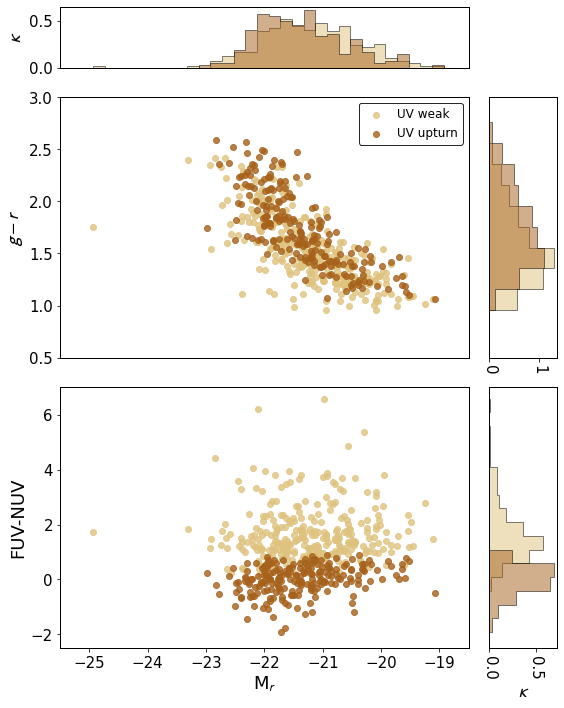

In [12]:
plt.rcParams.update(plotpars_3rows)

fig = plt.figure(figsize=(8, 10))
gs  = GridSpec(3, 2, height_ratios=[0.7, 3., 3.], width_ratios=[3., 0.5])

# PLOT 01 (left) =================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])
ax1_margy = fig.add_subplot(gs[1,1])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax1_joint.axes.set_ylim([0.5, 3.])
ax1_joint.axes.set_xlim([-25.5, -18.5])
ax1_joint.xaxis.set_visible(False)
l1 = ax1_joint.legend(loc='best', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')
ax1_joint.set_ylabel(r"$g-r$")


n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_R'], color=palette[0], alpha=0.5, 
                                  bins=np.arange(rsgs['MAG_ABSOLUTE_R'].min(), rsgs['MAG_ABSOLUTE_R'].max()+0.2, 
                                                 0.2), edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
ax1_margx.set_ylabel(r"$\kappa$")
ax1_margx.xaxis.set_visible(False)
ax1_margx.axes.set_xlim([-25.5, -18.5])

n, bins, patches = ax1_margy.hist(uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, 
                                  bins=np.arange((rsgs['MAG_AB_G']-rsgs['MAG_AB_R']).min(), 
                                                 (rsgs['MAG_AB_G']-rsgs['MAG_AB_R']).max()+0.2, 0.2), 
                                  edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
n, bins, patches = ax1_margy.hist(uvup['MAG_AB_G']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
ax1_margy.axes.set_ylim([0.5, 3.])
ax1_margy.yaxis.set_visible(False)

plt.setp(ax1_margy.get_xticklabels(), rotation=-90)

# PLOT 03 (left) =================================================================================================
ax3_joint = fig.add_subplot(gs[2,0])
ax3_margy = fig.add_subplot(gs[2,1])
ax3_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax3_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax3_joint.set_ylabel(r"FUV-NUV")
ax3_joint.set_xlabel(r"M$_{r}$")
ax3_joint.axes.set_ylim([-2.5, 7])
ax3_joint.axes.set_xlim([-25.5, -18.5])


n, bins, patches = ax3_margy.hist(uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], color=palette[0], alpha=0.5, 
                                  bins=np.arange((rsgs['MAG_AB_FUV']-rsgs['MAG_AB_NUV']).min(), 
                                                 (rsgs['MAG_AB_FUV']-rsgs['MAG_AB_NUV']).max()+0.5, 0.5), 
                                  edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
n, bins, patches = ax3_margy.hist(uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled', orientation='horizontal')
ax3_margy.axes.set_ylim([-2.5, 7.])
ax3_margy.yaxis.set_visible(False)
ax3_margy.set_xlabel(r"$\kappa$")
plt.setp(ax3_margy.get_xticklabels(), rotation=-90)


plt.tight_layout()
plt.savefig(os.path.join(results_path, 'opt_color_mags_01.png'))
plt.savefig(os.path.join(results_path, 'opt_color_mags_01.pdf'))
plt.show()

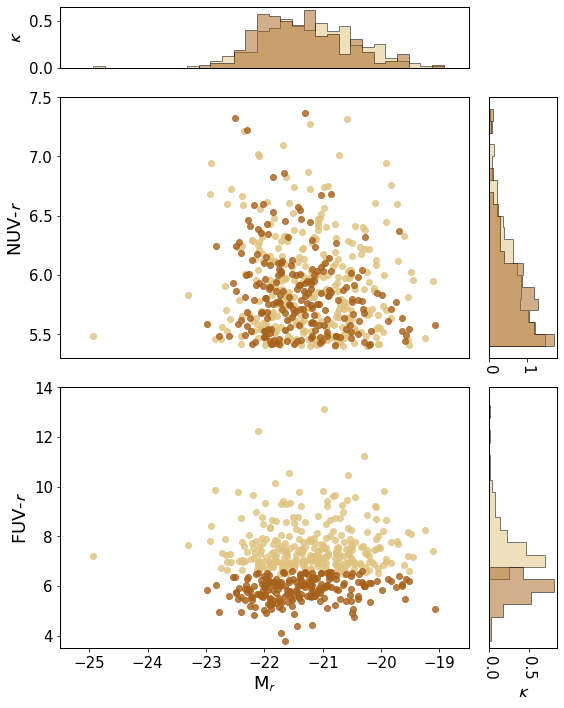

In [13]:
plt.rcParams.update(plotpars_3rows)

fig = plt.figure(figsize=(8, 10))
gs  = GridSpec(3, 2, height_ratios=[0.7, 3., 3.], width_ratios=[3., 0.5])

# PLOT 02 (right) ================================================================================================
ax2_joint = fig.add_subplot(gs[1,0])
ax2_margx = fig.add_subplot(gs[0,0])
ax2_margy = fig.add_subplot(gs[1,1])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax2_joint.set_ylabel(r"NUV-$r$")
ax2_joint.axes.set_ylim([5.3,7.5])
ax2_joint.axes.set_xlim([-25.5, -18.5])
ax2_joint.xaxis.set_visible(False)
# ax2_joint.yaxis.set_visible(False)


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_R'], color=palette[0], alpha=0.5, 
                                  bins=np.arange(min(rsgs['MAG_ABSOLUTE_R']), max(rsgs['MAG_ABSOLUTE_R'])+0.2, 
                                                 0.2), edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_R'], color=palette[1], alpha=0.5, 
                                  bins=bins, edgecolor='black', density=True, histtype='stepfilled')
ax2_margx.axes.set_xlim([-25.5, -18.5])
ax2_margx.xaxis.set_visible(False)
ax2_margx.set_ylabel(r"$\kappa$")
# ax2_margx.yaxis.set_visible(False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, 
                                  bins=np.arange(min(rsgs['MAG_AB_NUV']-rsgs['MAG_AB_R']), 
                                                max(rsgs['MAG_AB_NUV']-rsgs['MAG_AB_R'])+0.1, 0.1), 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
ax2_margy.axes.set_ylim([5.3,7.5])
ax2_margy.yaxis.set_visible(False)
plt.setp(ax2_margy.get_xticklabels(), rotation=-90)


ax2_margy.set_xlabel(r"")

# PLOT 04 (right) ================================================================================================
ax4_joint = fig.add_subplot(gs[2,0])
ax4_margy = fig.add_subplot(gs[2,1])

ax4_joint.scatter(uvwk['MAG_ABSOLUTE_R'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax4_joint.scatter(uvup['MAG_ABSOLUTE_R'], uvup['MAG_AB_FUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
ax4_joint.axes.set_ylim([3.5, 14])
ax4_joint.axes.set_xlim([-25.5, -18.5])

n, bins, patches = ax4_margy.hist(uvwk['MAG_AB_FUV']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, 
                                  bins=np.arange(min(rsgs['MAG_AB_FUV']-rsgs['MAG_AB_R']), 
                                                max(rsgs['MAG_AB_FUV']-rsgs['MAG_AB_R'])+0.5, 0.5),
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax4_margy.hist(uvup['MAG_AB_FUV']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
ax4_margy.yaxis.set_visible(False)
ax4_margy.axes.set_ylim([3.5, 14])
plt.setp(ax4_margy.get_xticklabels(), rotation=-90)
ax4_margy.set_xlabel(r"$\kappa$")

ax4_joint.set_xlabel(r"M$_{r}$")
ax4_joint.set_ylabel("FUV-$r$")

plt.tight_layout()
plt.savefig(os.path.join(results_path, 'opt_color_mags_02.png'))
plt.savefig(os.path.join(results_path, 'opt_color_mags_02.pdf'))
plt.show()